In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [47]:
data = pd.read_csv('./appraisal_emotion.csv')

In [24]:
data

,emotion,motivational_relevance,novelty,certainity,goal_congruence,coping_potential,anticipation
0,Fear,-0.44,0.63,-0.73,0.03,-0.17,0.59
1,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
2,Guilt,-0.60,0.00,0.15,-0.36,1.31,-0.29
3,Disgust,-0.38,0.06,0.39,-0.96,-0.50,-0.19
4,Sadness,-0.87,-0.14,0.00,-0.21,-0.36,1.15
...,...,...,...,...,...,...,...
996,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
997,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
998,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07
999,Shame,-0.73,0.07,-0.21,-0.11,1.31,-0.07


In [25]:
le = preprocessing.LabelEncoder()
data['emotion'] = le.fit_transform(data.emotion.values)

In [48]:
np.unique(data['emotion'])

array(['Anger', 'Disgust', 'Fear', 'Guilt', 'Joy', 'Sadness', 'Shame'],
      dtype=object)

In [27]:
data

,emotion,motivational_relevance,novelty,certainity,goal_congruence,coping_potential,anticipation
0,2,-0.44,0.63,-0.73,0.03,-0.17,0.59
1,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
2,3,-0.60,0.00,0.15,-0.36,1.31,-0.29
3,1,-0.38,0.06,0.39,-0.96,-0.50,-0.19
4,5,-0.87,-0.14,0.00,-0.21,-0.36,1.15
...,...,...,...,...,...,...,...
996,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
997,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
998,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07
999,6,-0.73,0.07,-0.21,-0.11,1.31,-0.07


In [33]:
column = 'anticipation'
data[column] = preprocessing.MinMaxScaler().fit_transform(np.array(data[column]).reshape(-1,1))

In [34]:
data

,emotion,motivational_relevance,novelty,certainity,goal_congruence,coping_potential,anticipation
0,2,0.184549,1.000000,0.000000,0.891892,0.342222,0.734597
1,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
2,3,0.115880,0.343750,0.739496,0.540541,1.000000,0.317536
3,1,0.210300,0.406250,0.941176,0.000000,0.195556,0.364929
4,5,0.000000,0.197917,0.613445,0.675676,0.257778,1.000000
...,...,...,...,...,...,...,...
996,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
997,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
998,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801
999,6,0.060086,0.416667,0.436975,0.765766,1.000000,0.421801


In [40]:
X = data.loc[:, data.columns != 'emotion'].values
y = data['emotion'].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        49

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        49

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



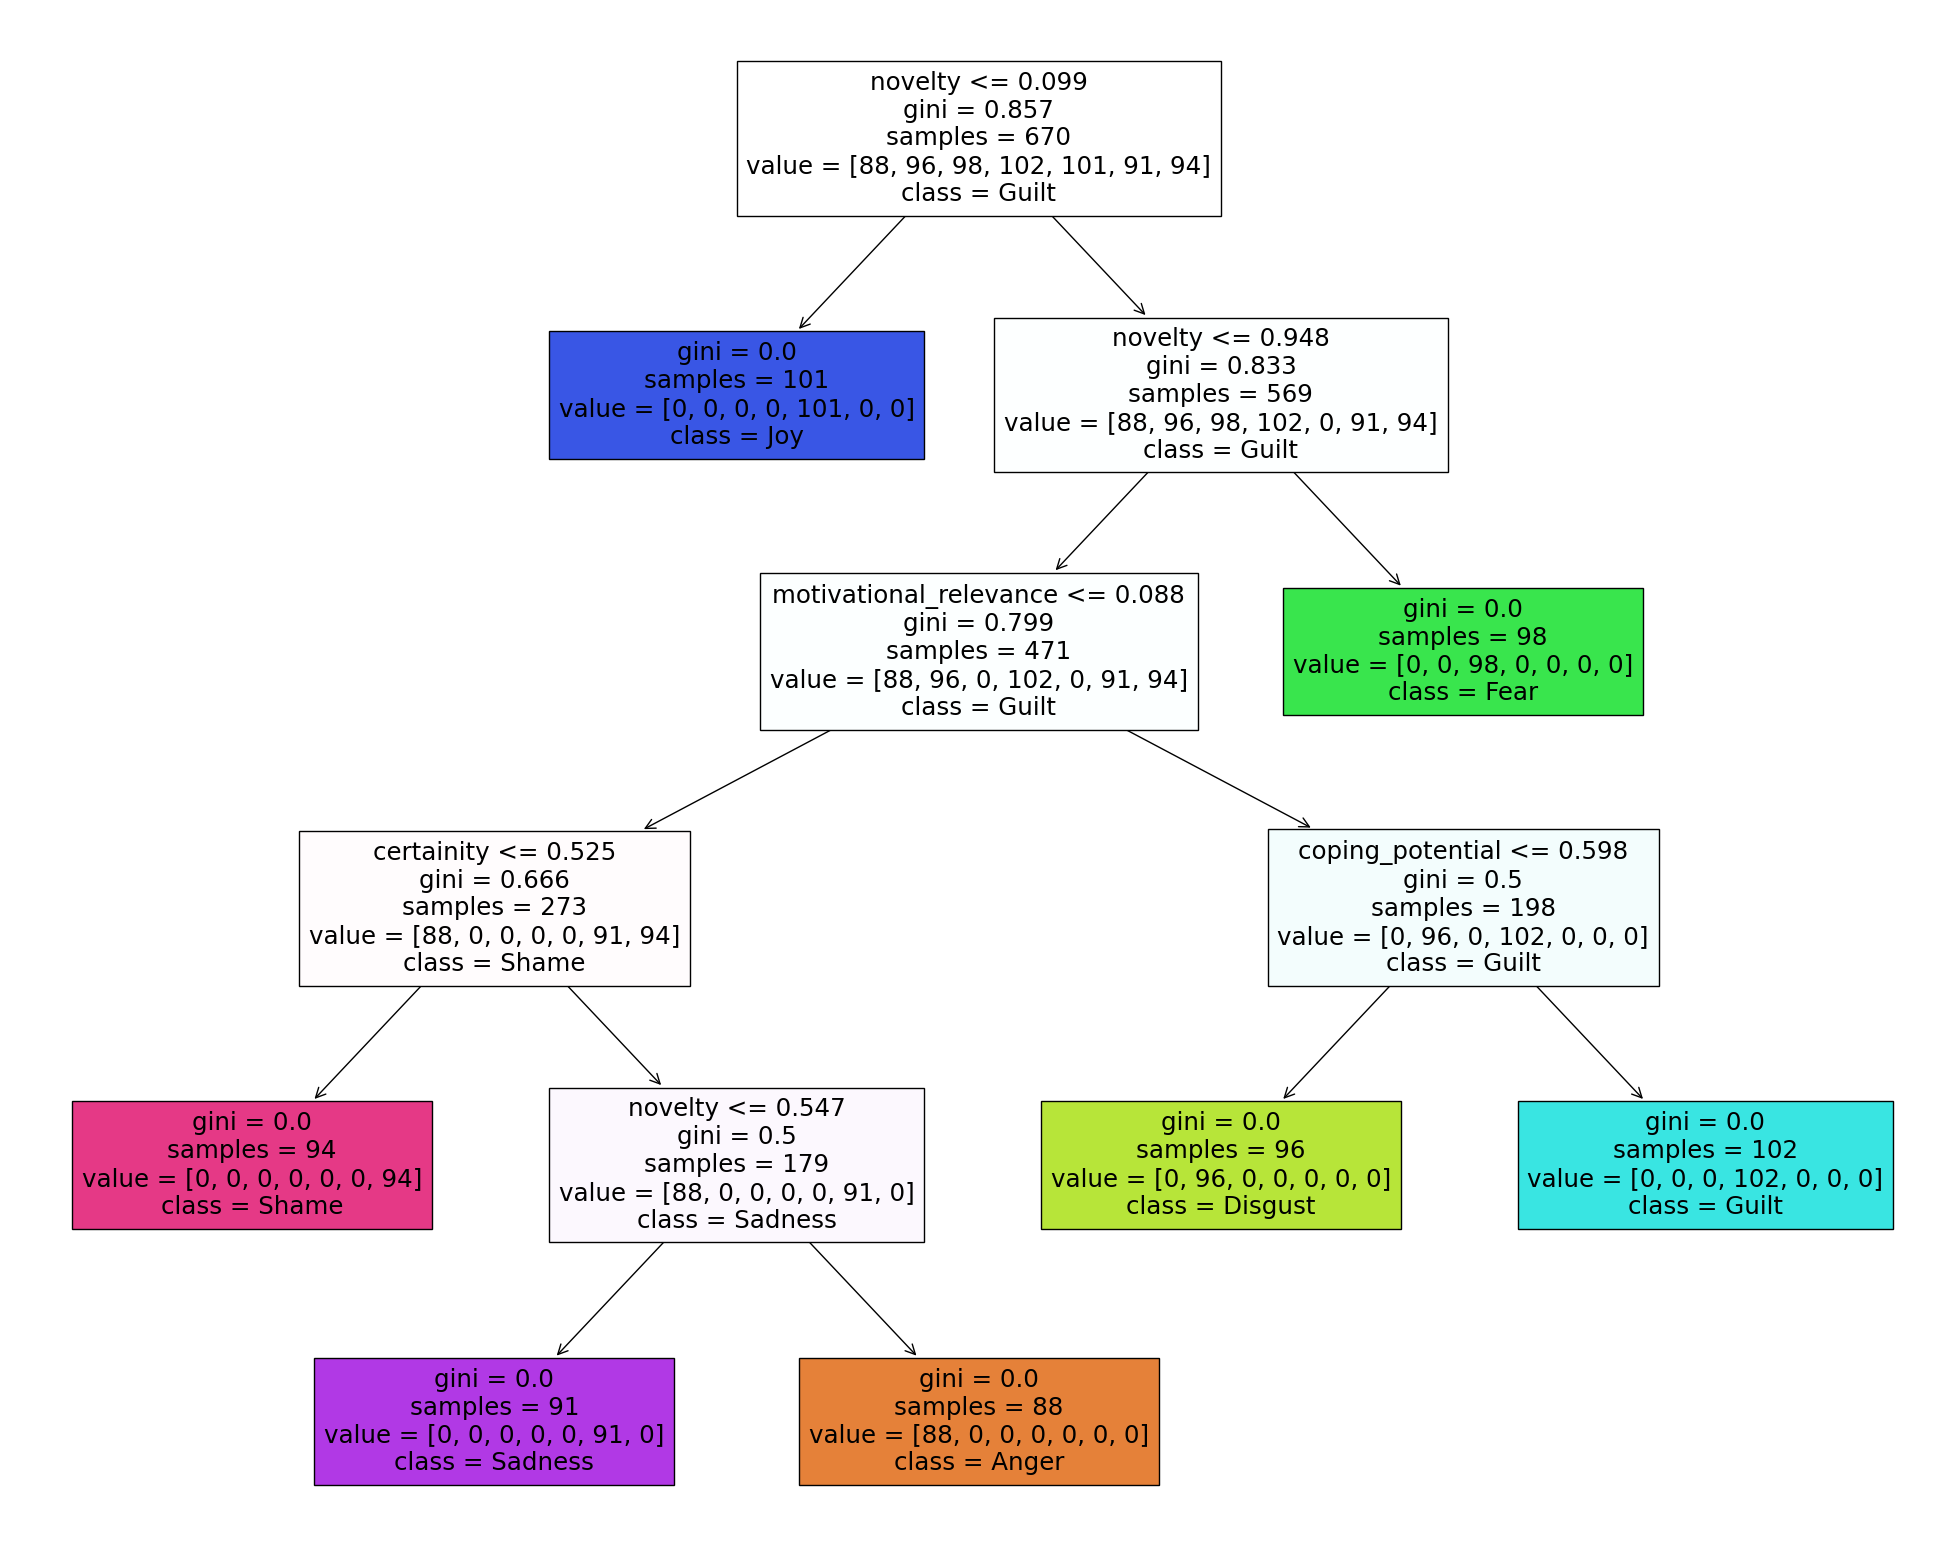

In [49]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['motivational_relevance', 'novelty', 'certainity', 'goal_congruence', 'coping_potential', 'anticipation'],  
                   class_names=['Anger', 'Disgust', 'Fear', 'Guilt', 'Joy', 'Sadness', 'Shame'],
                   filled=True)

In [50]:
import pickle
with open('emotion_estimator.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [51]:
with open('emotion_estimator.pkl', 'rb') as f:
    clf = pickle.load(f)

In [55]:
emo_dict = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Guilt', 4: 'Joy', 5: 'Sadness', 6: 'Shame'}

In [61]:
pre = clf.predict([[0.0, 0.7105862927161081, 0.02662937558953352, 0.0, 0.80004, 0.6476273011854936]])

In [62]:
print(emo_dict[pre[0]])

Shame
